This exercise involves the Boston housing data set.

(a) To begin, load in the Boston data set, which is part of the ISLP
library.

In [29]:
# pip install ISLP  # 若尚未安裝
from ISLP import load_data
import pandas as pd
import numpy as np

boston = load_data('Boston')  # 回傳 pandas DataFrame
boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


(b) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [31]:
# 幾列幾欄
print("資料集形狀 (rows, columns):", df.shape)

# 欄位名稱
print("\n欄位名稱:")
print(df.columns.tolist())

# 每個欄位簡單解釋
explain = {
    "crim": "人均犯罪率",
    "zn": "住宅用地比例 (>=25,000平方英尺)",
    "indus": "非零售業商業用地比例",
    "chas": "是否臨查爾斯河 (1=是, 0=否)",
    "nox": "氮氧化物濃度 (ppm)",
    "rm": "平均房間數",
    "age": "1940年前建造的自住房比例",
    "dis": "到波士頓五個就業中心的加權距離",
    "rad": "放射狀幹道可達性指數",
    "tax": "房產稅率 (每萬元)",
    "ptratio": "師生比例",
    "black": "黑人比例指標",
    "lstat": "低社經人口比例 (%)",
    "medv": "自有住宅中位價格 (千美元)"
}

print("\n欄位解釋：")
for k,v in explain.items():
    print(f"{k}: {v}")


資料集形狀 (rows, columns): (506, 14)

欄位名稱:
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

欄位解釋：
crim: 人均犯罪率
zn: 住宅用地比例 (>=25,000平方英尺)
indus: 非零售業商業用地比例
chas: 是否臨查爾斯河 (1=是, 0=否)
nox: 氮氧化物濃度 (ppm)
rm: 平均房間數
age: 1940年前建造的自住房比例
dis: 到波士頓五個就業中心的加權距離
rad: 放射狀幹道可達性指數
tax: 房產稅率 (每萬元)
ptratio: 師生比例
black: 黑人比例指標 (1000*(Bk - 0.63)^2)
lstat: 低社經人口比例 (%)
medv: 自有住宅中位價格 (千美元)


(c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

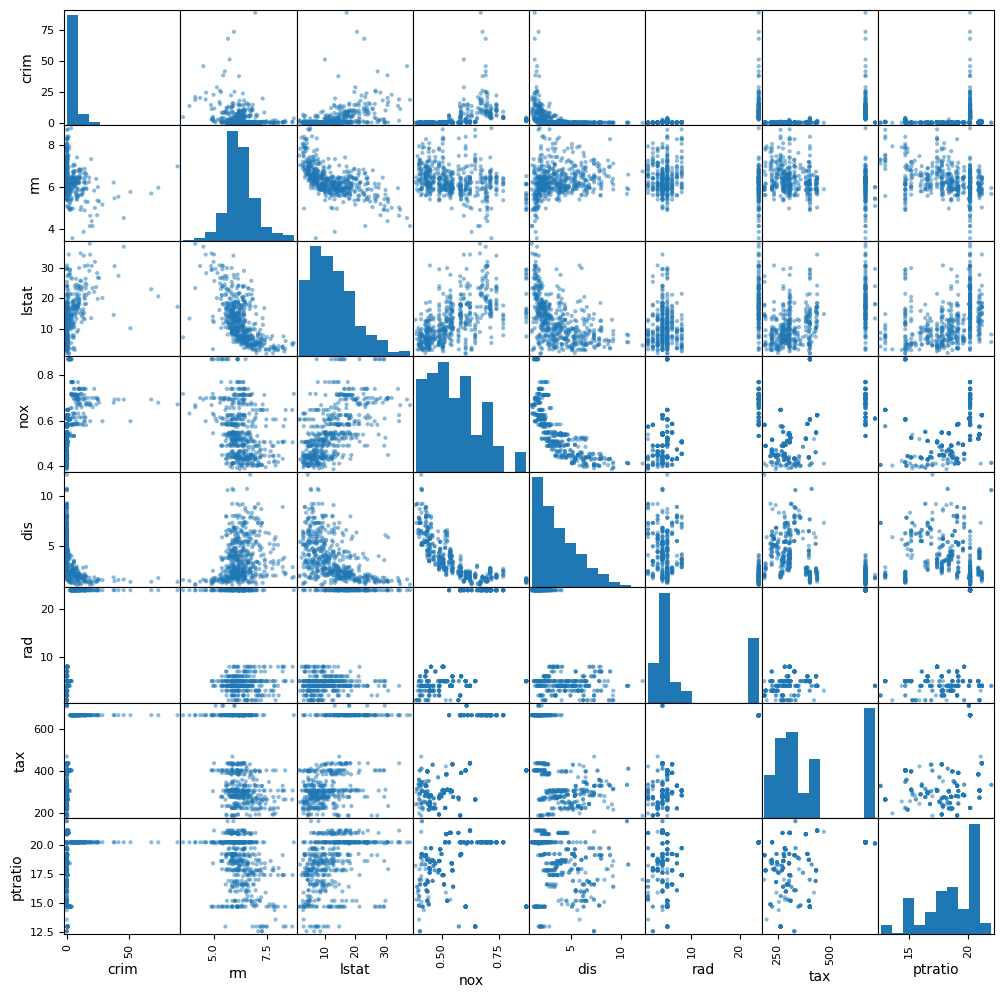

In [32]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

cols = ['crim','rm','lstat','nox','dis','rad','tax','ptratio']
_ = scatter_matrix(boston[cols], figsize=(12, 12), diagonal='hist')
plt.show()


rad 與 tax 幾乎呈現離散的強正相關（因為某些區段稅率和道路可達性齊升）。

nox 與 dis 呈現明顯負相關（越靠近市中心，污染越高，距離越短）。

lstat 與 rm 呈現負相關（房間數多的郊區，低社經人口比例通常較低）。

crim、lstat 與 nox、tax、rad 多呈正相關。

(d) Are any of the predictors associated with per capita crime rate?If so, explain the relationship.

In [33]:
boston.corr(numeric_only=True)['crim'].sort_values(ascending=False)


,crim
crim,1.000000
rad,0.625505
tax,0.582764
lstat,0.455621
nox,0.420972
indus,0.406583
age,0.352734
ptratio,0.289946
chas,-0.055892
zn,-0.200469


#**與 crim 正相關、且關聯度較高的預測變數**
rad 0.626、tax 0.583 → 犯罪率在幹道可達性高、稅率高的區域較高。這兩者常是高度都會化/交通樞紐與高密度開發的指標，往往伴隨更複雜的人口與商業活動。
其次：lstat 0.456（低社經比例高 → 犯罪率較高）、nox 0.421（污染高 → 更靠近都心/工業區）、indus 0.407（工業用地比高）、age 0.353（舊屋比例高）、ptratio 0.290（師生比高）。

#**與 crim 負相關的預測變數**
dis −0.380、medv −0.388、rm −0.219、zn −0.200 → 距離就業中心遠、房價高、房間數多、低密度住宅區比例高的地方，犯罪率傾向較低；這些變數多半與郊區、住宅品質較佳相連。

(e) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

In [34]:
boston[['crim','tax','ptratio']].describe().T


,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
ptratio,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


#犯罪率 crim
有少數郊區的犯罪率特別高，而且離群程度很明顯
#師生比 ptratio
有高師生比的郊區
#稅率
高稅率郊區也明顯

(f) How many of the suburbs in this data set bound the Charles
river?

In [35]:
int(boston['chas'].sum())

35

(g) What is the median pupil-teacher ratio among the towns in this data set?

In [36]:
float(boston['ptratio'].median())

19.05

(h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [37]:
idx = boston['medv'].idxmin()
row = boston.loc[idx]
row, idx

(crim        38.3518
 zn           0.0000
 indus       18.1000
 chas         0.0000
 nox          0.6930
 rm           5.4530
 age        100.0000
 dis          1.4896
 rad         24.0000
 tax        666.0000
 ptratio     20.2000
 lstat       30.5900
 medv         5.0000
 Name: 398, dtype: float64,
 398)

這筆樣本幾乎把多數「對房價不利」的指標都拉在極端或高位：
高犯罪 (crim)、高污染 (nox)、高幹道可達 (rad)、高稅 (tax)、高師生比 (ptratio)、高弱勢比例 (lstat)、舊屋比例極高 (age)、距離就業中心很近 (dis 低)、房間數偏少 (rm 低)、且非低密度住宅區 (zn=0)。

這些特徵共同指向：高密度、老舊、靠市區/幹道、社經弱勢比例高 的環境樣貌——與 最低房價 medv=5.0 的結果一致。

(i) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [38]:
(boston['rm'] > 7).sum(), (boston['rm'] > 8).sum()

(np.int64(64), np.int64(13))

全體範圍：大約 3.56 → 8.78
中位數：約 6.2 左右
所以 7 間以上 已屬於偏高端住宅區，8 間以上 更是少數菁英社區。